In [1]:
#from lecture notes on Ridge/Lasso regression
def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    #print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

/tmp/ipykernel_588/2062770370.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain = imread('SRTM_data_Norway_1.tif')


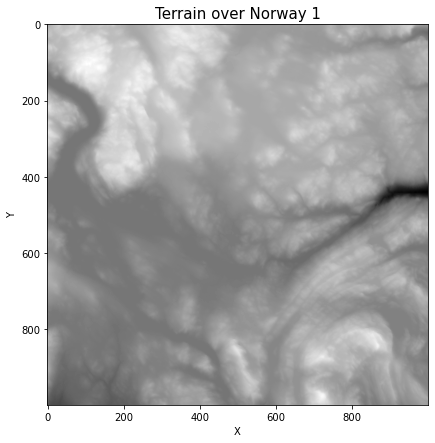

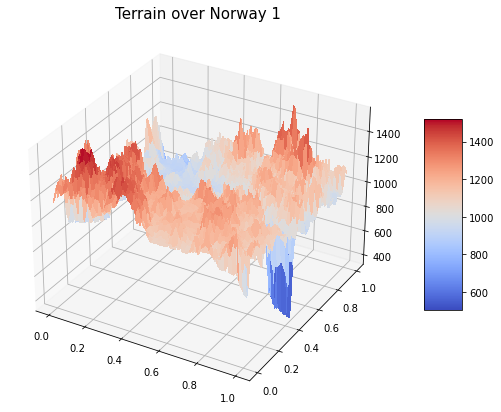

In [14]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#interactable 3d plots
#%matplotlib notebook 
from matplotlib import cm
import numpy as np
from numpy.random import normal, uniform

# Load the terrain
terrain = imread('SRTM_data_Norway_1.tif')

N = 1000
m = 5 # polynomial order
terrain = terrain[:N,:N]
# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
X = create_X(x_mesh, y_mesh,m)


# Show the terrain
plt.figure(figsize = (7, 7))
plt.title('Terrain over Norway 1', fontsize = 15)
plt.imshow(z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot the surface.
fig = plt.figure(figsize = (13, 7)) 
ax = fig.add_subplot(projection='3d') #

surf = ax.plot_surface(x_mesh, y_mesh, z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#ax.set_zlim(-0.10, 1.40)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Terrain over Norway 1', fontsize = 15)
plt.show()